In [241]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn.datasets as dt
from sklearn import datasets
import seaborn as sns
# Needed for generating data from an existing dataset
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler, quantile_transform


## Synthetic Generation of Data

In [70]:

x,y = dt.make_regression(n_samples=200,
                             n_features=1,
                             noise=15,
                             random_state=1)
x.shape



(200, 1)

## Visualize the Model without any Outliers

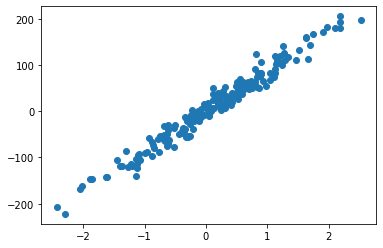

In [71]:
plt.scatter(x,y)

## Fitting a regression line to our model

Coefficient [87.21859652]
Intercept -0.31273696519580696


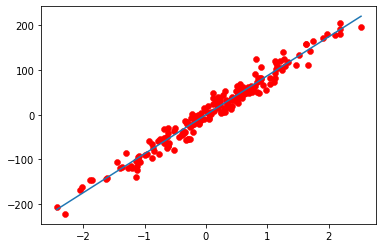

In [72]:
regr = LinearRegression()
regr.fit(x, y)
plt.figure(figsize = (6, 4))
plt.scatter(x, y,color = "red", linewidth=0.5)
plt.plot([x.min(),x.max()],[regr.coef_*x.min(),regr.coef_*x.max()])
print("Coefficient", regr.coef_)
print("Intercept", regr.intercept_)

In [73]:
mean_squared_error(y, regr.predict(x))

218.28893540159774

## Adding Outliers at extreme X positions in the created data

In [74]:
def showmodel(x,y,numofoutliers,rangeofoutlier,print_graph = False,figuresize = (12,4)):
    rmse = []
    xwithoutliers = []
    outliersx =[]
    outliersy = []
    ywithoutliers = []
    coeficient = []
    intercept = []
    np.random.seed(0)
    outliersx.append(np.random.uniform(rangeofoutlier[0],rangeofoutlier[1], size = (numofoutliers)))
    outliersx.append(np.random.uniform(-rangeofoutlier[0],-rangeofoutlier[1], size = (numofoutliers)))    
    outliersy.append(np.random.uniform(y.max(),y.max()+numofoutliers, size = (numofoutliers)))
    outliersy.append(np.random.uniform(y.mean(),y.mean()+numofoutliers, size = (numofoutliers)))
    outliersy.append(np.random.uniform(y.min(),y.min()+numofoutliers, size = (numofoutliers)))
    xwithoutliers.append(np.append(x, outliersx[0]))
    xwithoutliers.append(np.append(x, outliersx[1]))
    plt.figure(figsize = figuresize)
    for i in range(6):
        ywithoutliers.append(np.append(y, outliersy[i%3]))
        regr = LinearRegression()
        regr.fit(xwithoutliers[i//3].reshape(-1,1), ywithoutliers[i]) ## // is used to get integer value
        coeficient.append(regr.coef_)
        intercept.append(regr.intercept_)
        rmse.append(mean_squared_error(ywithoutliers[i].reshape(-1,1), regr.predict(xwithoutliers[i//3].reshape(-1,1))))
        if print_graph == True:
            plt.subplot(2,3,i+1)
            plt.scatter(x, y,color = "red", linewidth=1)
            plt.scatter(outliersx[i//3],outliersy[i%3], color = "blue", linewidth = 0.5)
            plt.plot([xwithoutliers[i//3].min(),xwithoutliers[i//3].max()],[int(regr.coef_)*xwithoutliers[i//3].min(),int(regr.coef_)*xwithoutliers[i//3].max()])
            title = "coeficient: " + str(float(regr.coef_))
            plt.title(title)
    if print_graph == True:
        plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
        plt.show()
    return coeficient,intercept,rmse

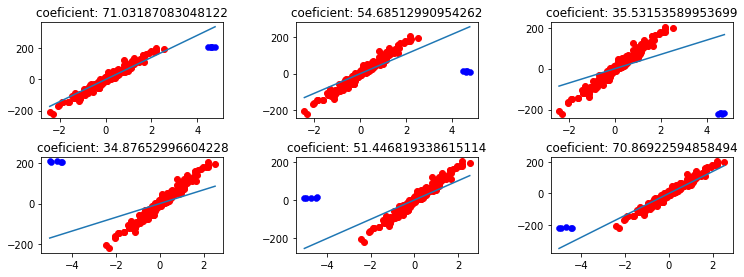

In [93]:
coeficient,intercept,rmse = showmodel(x,y,numofoutliers=5,rangeofoutlier = (2*x.max() - 1,2*x.max()) , print_graph=True)

In [91]:
def effectofoutlier(x,y,numofoutliers,rangeofoutlier):    
    table1 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    table2 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    table3 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    table4 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    table5 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    table6 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                'RMSE':[]
                })
    for i in range(numofoutliers +1):
        coeficient,intercept,rmse = showmodel(x,y,i,rangeofoutlier )
        table1.loc[len(table1.index )] = [str(1),str(i),coeficient[0], intercept[0],rmse[0]]
        table2.loc[len(table2.index )] = [str(2),str(i),coeficient[1], intercept[1],rmse[1]]
        table3.loc[len(table3.index )] = [str(3),str(i),coeficient[2], intercept[2],rmse[2]]
        table4.loc[len(table4.index )] = [str(4),str(i),coeficient[3], intercept[3],rmse[3]]
        table5.loc[len(table5.index )] = [str(5),str(i),coeficient[4], intercept[4],rmse[4]]
        table6.loc[len(table6.index )] = [str(6),str(i),coeficient[5], intercept[5],rmse[5]]
    table = table1.append(table2.append(table3.append(table4.append(table5.append(table6)))))
    table.set_index(np.arange(len(table.index)),inplace = True)
    return table


In [92]:
table1 = effectofoutlier(x,y,5,(2*x.max() - 1,2*x.max()))
table1

,Position,Number of outliers,Regression coefficient,Regression intercept,RMSE
0,1,0,[87.21859651708925],-0.312737,218.288935
1,1,1,[82.51137487759623],-0.677086,385.646537
2,1,2,[78.36219099410408],-0.967497,536.721178
3,1,3,[75.32580819348416],-1.197014,639.865138
4,1,4,[72.8950331554318],-1.388390,720.206499
5,1,5,[71.03187083048122],-1.550374,777.178706
6,2,0,[87.21859651708925],-0.312737,218.288935
7,2,1,[77.77709794905354],-1.043529,894.855547
8,2,2,[69.7736086762653],-1.603738,1459.582561
9,2,3,[63.620063537253856],-2.068644,1887.261165


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

## Increasing the magnitude of outlier

In [94]:
table2 = effectofoutlier(x,y,5,(2.5*x.max() - 1,2.5*x.max()))
table3 = effectofoutlier(x,y,5,(3*x.max() - 1,3*x.max()))
table4 = effectofoutlier(x,y,5,(3.5*x.max() - 1,3.5*x.max()))
table5 = effectofoutlier(x,y,5,(4*x.max() - 1,4*x.max()))
table = table1.drop(['Regression coefficient','Regression intercept','RMSE'], axis = 1)
table["Regression coefficient for range (2,5)"] = table1['Regression coefficient']
table["Regression coefficient for range (5.3,6.3)"] = table2['Regression coefficient']
table["Regression coefficient for range (6.5,7.5)"] = table3['Regression coefficient']
table["Regression coefficient for range (7.8,8.8)"] = table4['Regression coefficient']
table["Regression coefficient for range (9.1,10.1)"] = table5['Regression coefficient']
table

C:\Users\Sunny\Anaconda3\envs\tensorflow.sessions\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Sunny\Anaconda3\envs\tensorflow.sessions\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Sunny\Anaconda3\envs\tensorflow.sessions\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

,Position,Number of outliers,"Regression coefficient for range (2,5)","Regression coefficient for range (5.3,6.3)","Regression coefficient for range (6.5,7.5)","Regression coefficient for range (7.8,8.8)","Regression coefficient for range (9.1,10.1)"
0,1,0,[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925]
1,1,1,[82.51137487759623],[78.39817557830091],[73.67938450879846],[68.67225733900936],[63.628033928776105]
2,1,2,[78.36219099410408],[71.71388265510436],[64.82209809282261],[58.194341886285976],[52.10274206024243]
3,1,3,[75.32580819348416],[67.1141181527603],[59.16389615717181],[51.97828959097492],[45.71899588966846]
4,1,4,[72.8950331554318],[63.64266713432849],[55.13435865897117],[47.77396532557187],[41.58687889484536]
5,1,5,[71.03187083048122],[61.04797457067351],[52.22124717329471],[44.82686333735053],[38.76525506101897]
6,2,0,[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925]
7,2,1,[77.77709794905354],[72.72756274149866],[67.2828201144643],[61.7463336872605],[56.344727924885]
8,2,2,[69.7736086762653],[61.98165771747522],[54.42990959363985],[47.51247413922344],[41.394048714788205]
9,2,3,[63.620063537253856],[54.353816055820644],[46.02445746199222],[38.90101077092455],[32.96717679260355]


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

## Detecting and removing outliers

## Using scatter plot

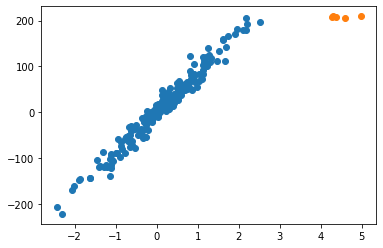

In [27]:
outlierx = np.random.uniform(2*x.max() - 1,2*x.max(), size = (5))
outliery = np.random.uniform(y.max(),y.max()+5, size = (5))
xwithoutlier = np.append(x,outlierx)
ywithoutlier = np.append(y,outliery)
plt.scatter(x,y)
plt.scatter(outlierx,outliery)

## Using boxplot

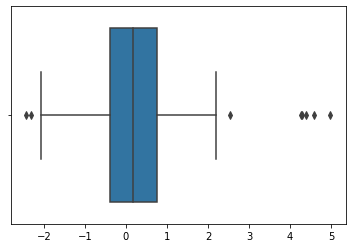

In [28]:
sns.boxplot(x=xwithoutlier)

## Using zscore value

In [29]:
z = np.abs(stats.zscore(xwithoutlier))
print(z)

[1.65113591e-02 2.24187924e-01 2.98795689e-01 2.56767023e-01
 1.75124730e+00 2.54735481e-01 4.27611624e-01 1.63430321e+00
 2.80882791e-01 3.95048644e-02 7.64024808e-01 2.65416367e-01
 5.81351370e-01 5.87815309e-01 2.80149329e-01 1.55609099e+00
 9.07334992e-01 5.13825922e-01 2.01083754e-01 1.16165041e+00
 7.37168980e-01 6.36347320e-02 3.36997473e-01 1.35879380e+00
 1.40857633e+00 9.69001004e-01 6.09726694e-01 2.87872183e-01
 2.56918015e-01 8.40034836e-01 1.28160176e+00 4.67450192e-01
 4.53131895e-01 1.83892597e+00 3.17490023e-04 1.98468160e+00
 1.45269979e-01 5.29930649e-01 8.96989225e-01 3.87174140e-01
 1.75454912e+00 7.85618812e-01 1.83185425e-01 1.14217433e+00
 1.20552242e+00 2.01897320e-01 1.25187183e+00 2.11692268e-01
 1.15909577e+00 8.31939882e-02 3.44755478e-01 5.22933514e-01
 7.85100611e-01 7.56758937e-01 6.58630753e-01 6.10378852e-01
 1.86036423e-01 4.86492696e-01 9.52720832e-01 3.10946892e-01
 6.76240640e-02 6.36572154e-01 3.90712070e-01 8.74276548e-01
 9.91913961e-01 4.650924

In [30]:
print(np.where(z > 3))

(array([200, 201, 202, 203, 204], dtype=int64),)


## With multiple features

In [37]:
xm,ym = dt.make_regression(n_samples=500,
                             n_features=10,
                             noise=5,
                             random_state=1)

In [38]:
xm = pd.DataFrame(xm)
xm.columns = ["Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7","Feature8","Feature9","Feature10"]
xm

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,-0.449014,-0.317011,0.037592,-1.030724,0.321073,0.733294,-0.163735,-0.581676,0.242574,-0.400652
1,-0.451651,-0.182916,0.639034,1.269868,-0.959332,-0.529731,1.193456,0.263967,2.260748,0.632917
2,1.806458,-0.386946,-0.167858,1.000893,-0.803471,-0.857692,-1.330638,0.263040,0.147801,-2.155325
3,1.463109,0.118606,0.226165,1.919382,-0.497031,0.025264,-1.103974,0.312941,0.496884,-0.138792
4,-0.237500,-0.144220,-1.386060,0.613719,-0.302272,-1.244140,0.792378,-0.056341,-0.082253,-0.938604
...,...,...,...,...,...,...,...,...,...,...
495,0.049062,-0.359224,-0.806178,0.677808,1.217941,-0.596086,0.505382,-1.940681,-1.106573,0.861623
496,0.331694,-1.835899,0.998671,0.094415,-1.776323,-0.849967,0.339025,-0.801947,-1.456690,-0.014990
497,1.235114,0.748611,1.473576,-0.786384,0.141397,0.422512,-1.035397,-0.266128,0.430063,-1.962186
498,-0.890556,-0.562305,-1.650721,-0.400878,-1.331952,-1.119115,1.954878,-1.760689,0.824006,1.956079


## Lets add outliers in different columns

In [39]:
#Here outliers are added at distance of 25 in rows and alternate columns.
xmwithoutlier = xm
i = 0
for column in xmwithoutlier.columns:
    if i % 4 == 0:
        xmwithoutlier[column][np.arange(0,500,25)] = np.random.uniform(2*xmwithoutlier[column].min() + 1,2*xmwithoutlier[column].min(),size = (20))  
    elif i % 2 == 0:
        xmwithoutlier[column][np.arange(0,500,25)] = np.random.uniform(2*xmwithoutlier[column].max() - 1,2*xmwithoutlier[column].max(),size = (20))
    
    i += 1

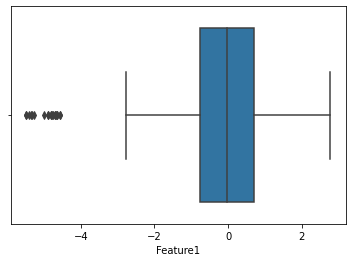

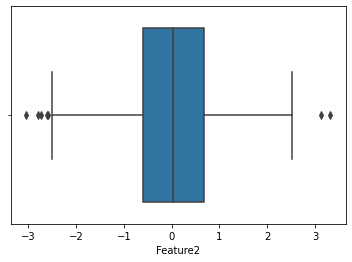

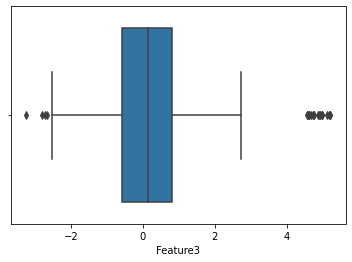

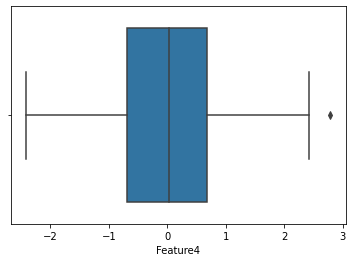

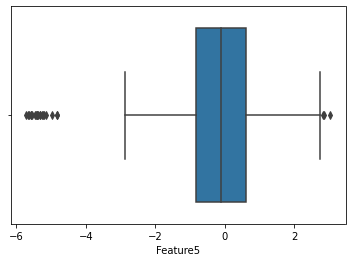

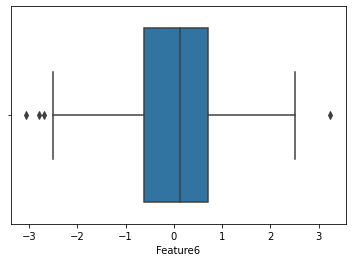

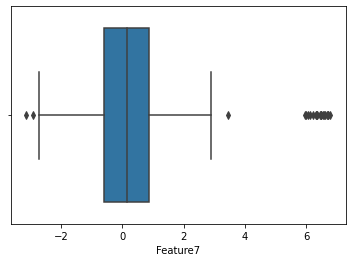

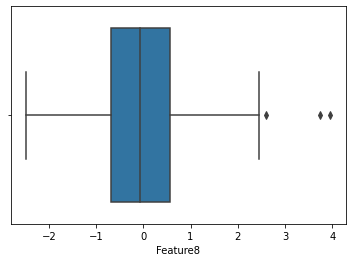

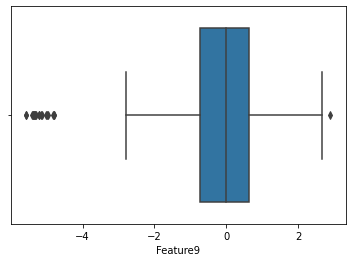

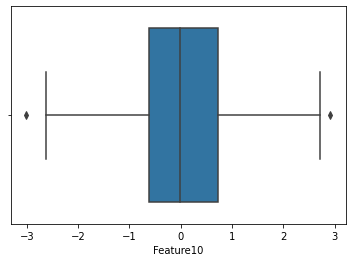

In [40]:
for column in xwithoutlier.columns:
    sns.boxplot(x=xwithoutlier[column])
    plt.show()

In [41]:
z = np.abs(stats.zscore(xmwithoutlier))
print(np.where(z > 3))

(array([  0,   0,   0,   0,   0,  25,  25,  25,  25,  25,  50,  50,  50,
        50,  50,  75,  75,  75,  75,  75,  92, 100, 100, 100, 100, 100,
       125, 125, 125, 125, 125, 134, 150, 150, 150, 150, 150, 162, 175,
       175, 175, 175, 175, 200, 200, 200, 200, 200, 224, 225, 225, 225,
       225, 225, 250, 250, 250, 250, 250, 275, 275, 275, 275, 275, 300,
       300, 300, 300, 300, 325, 325, 325, 325, 325, 350, 350, 350, 350,
       350, 375, 375, 375, 375, 375, 391, 400, 400, 400, 400, 400, 425,
       425, 425, 425, 425, 441, 450, 450, 450, 450, 450, 475, 475, 475,
       475, 475, 491], dtype=int64), array([0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 7, 0,
       2, 4, 6, 8, 0, 2, 4, 6, 8, 5, 0, 2, 4, 6, 8, 5, 0, 2, 4, 6, 8, 0,
       2, 4, 6, 8, 7, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2,
       4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 1, 0, 2, 4,
       6, 8, 0, 2, 4, 6, 8, 1, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 9],
      dtype=int64))


 First and second  array are row and column numbers for outliers

In [42]:
zxwithoutoutlier = xwithoutlier[(z < 3).all(axis=1)]

In [43]:
zxwithoutoutlier.head(55)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,-0.451651,-0.182916,0.639034,1.269868,-0.959332,-0.529731,1.193456,0.263967,2.260748,0.632917
2,1.806458,-0.386946,-0.167858,1.000893,-0.803471,-0.857692,-1.330638,0.263040,0.147801,-2.155325
3,1.463109,0.118606,0.226165,1.919382,-0.497031,0.025264,-1.103974,0.312941,0.496884,-0.138792
4,-0.237500,-0.144220,-1.386060,0.613719,-0.302272,-1.244140,0.792378,-0.056341,-0.082253,-0.938604
5,0.555170,0.984630,-0.144619,-1.526886,-0.048464,-0.136638,-1.587069,-1.241394,1.231782,-1.363868
6,-1.500177,0.186075,1.400618,0.857548,-0.002747,0.138879,-0.188117,1.335141,0.137885,-1.204101
7,-0.331031,-0.839024,-1.535324,0.548388,-0.850802,-1.900402,0.106350,0.020956,-0.269218,1.859564
8,-2.032167,1.799212,-1.040963,1.513841,-0.771039,0.815989,-0.235411,-0.544246,-1.355271,-0.153647
9,0.807456,-0.031817,-0.300976,-0.592461,0.288078,0.312239,0.112488,1.498108,-2.304908,-0.193322
10,0.089686,-0.799547,-0.563789,-1.719394,-0.258983,-0.601157,-0.291595,0.189293,0.057121,0.556074


Here we can see the 0th,25th and 50th.... rows are not present cause we added otliers at these positions previously

In [44]:
zxwithoutoutlier.shape

(473, 10)

## Using IQR(Interquartile range) score

In [45]:
Q1 = xmwithoutlier.quantile(0.25)
Q3 = xmwithoutlier.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Feature1     1.476248
Feature2     1.280494
Feature3     1.385612
Feature4     1.376983
Feature5     1.455881
Feature6     1.322980
Feature7     1.449864
Feature8     1.254015
Feature9     1.380901
Feature10    1.348179
dtype: float64


In [46]:
print(xmwithoutlier < (Q1 - 1.5 * IQR)) or (xmwithoutlier > (Q3 + 1.5 * IQR))

     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0        True     False     False     False      True     False     False   
1       False     False     False     False     False     False     False   
2       False     False     False     False     False     False     False   
3       False     False     False     False     False     False     False   
4       False     False     False     False     False     False     False   
..        ...       ...       ...       ...       ...       ...       ...   
495     False     False     False     False     False     False     False   
496     False     False     False     False     False     False     False   
497     False     False     False     False     False     False     False   
498     False     False     False     False     False     False     False   
499     False     False     False     False     False     False     False   

     Feature8  Feature9  Feature10  
0       False      True      False  
1

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,False,False,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False


In [47]:
ixwithoutoutlier = xwithoutlier[~((xwithoutlier < (Q1 - 1.5 * IQR)) |(xwithoutlier > (Q3 + 1.5 * IQR))).any(axis=1)]
xwithoutoutlier

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,-0.451651,-0.182916,0.639034,1.269868,-0.959332,-0.529731,1.193456,0.263967,2.260748,0.632917
2,1.806458,-0.386946,-0.167858,1.000893,-0.803471,-0.857692,-1.330638,0.263040,0.147801,-2.155325
3,1.463109,0.118606,0.226165,1.919382,-0.497031,0.025264,-1.103974,0.312941,0.496884,-0.138792
4,-0.237500,-0.144220,-1.386060,0.613719,-0.302272,-1.244140,0.792378,-0.056341,-0.082253,-0.938604
5,0.555170,0.984630,-0.144619,-1.526886,-0.048464,-0.136638,-1.587069,-1.241394,1.231782,-1.363868
...,...,...,...,...,...,...,...,...,...,...
495,0.049062,-0.359224,-0.806178,0.677808,1.217941,-0.596086,0.505382,-1.940681,-1.106573,0.861623
496,0.331694,-1.835899,0.998671,0.094415,-1.776323,-0.849967,0.339025,-0.801947,-1.456690,-0.014990
497,1.235114,0.748611,1.473576,-0.786384,0.141397,0.422512,-1.035397,-0.266128,0.430063,-1.962186
498,-0.890556,-0.562305,-1.650721,-0.400878,-1.331952,-1.119115,1.954878,-1.760689,0.824006,1.956079


## Effect of outliers on normalization of covariates

Let's see the effect on min max normalization

$$
    X_{norm} =  \frac{X - X_{min}}{X_{max}-X_{min}}\
$$

sklearn.datasets.make_regression generate a set of standardized covariates i.e., mean close to 0 and standard deviation  close to 1.

In [171]:
xn,yn = dt.make_regression(n_samples=200,
                             n_features=10,
                             noise=15,
                             random_state=10)
xn = pd.DataFrame(xn)
xn.columns = ["Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7","Feature8","Feature9","Feature10"]
xn

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,1.453864,-0.406279,0.982680,0.518433,0.123790,0.637671,-0.200360,-0.669287,-0.210669,-0.089216
1,0.430540,-0.403684,0.904246,0.360255,1.071202,0.271570,2.222352,-0.995481,-0.859670,0.422510
2,0.640702,-1.257203,-0.492863,0.705960,-0.059703,0.190473,-0.553109,0.722987,-0.606029,1.758473
3,-1.200979,0.846185,-0.203603,0.792239,0.611230,-0.119553,-0.664237,-0.791102,1.271821,-0.076605
4,2.494901,-0.462448,-0.797077,1.079008,-0.873357,-0.152850,1.990225,-0.264176,0.961359,0.713123
...,...,...,...,...,...,...,...,...,...,...
195,0.986598,0.028227,-1.586552,0.133137,-0.822368,-1.941300,0.160399,1.202744,-1.130475,-1.024753
196,0.134820,0.744463,-0.146590,-0.536554,-1.008957,-0.080281,0.806508,0.161260,-0.882365,0.272979
197,1.339926,0.029310,1.447166,-0.229947,1.985386,-0.221793,0.313831,-1.129551,-1.225836,-0.639963
198,0.026097,-0.969706,0.412533,0.884368,-0.983728,0.477234,-2.176609,-1.386823,0.618949,0.653662


Let's check the mean and standard deviation of each covariate after normalizing the covariates.

In [172]:
scaling = MinMaxScaler()
xnorm = pd.DataFrame(scaling.fit_transform(xn))
xnorm.columns = xn.columns
meanwno = []

stdwno = []
for col in xnorm.columns:
    meanwno.append(xnorm[col].mean())
    stdwno.append(xnorm[col].std())
    print('For {} Min: {}. Mean: {}. Max: {}.  Std :{} .'.format(col, xnorm[col].min(), xnorm[col].mean(), xnorm[col].max(),  xnorm[col].std()))

For Feature1 Min: 0.0. Mean: 0.570806428372237. Max: 1.0000000000000002.  Std :0.16996881060268626 .
For Feature2 Min: 0.0. Mean: 0.4946175843281547. Max: 1.0.  Std :0.18353901002979497 .
For Feature3 Min: 0.0. Mean: 0.5481799246671845. Max: 1.0.  Std :0.17998176653466066 .
For Feature4 Min: 0.0. Mean: 0.5073200039560255. Max: 1.0.  Std :0.17690888842173777 .
For Feature5 Min: 0.0. Mean: 0.5464918553064905. Max: 1.0.  Std :0.1683252898081433 .
For Feature6 Min: 0.0. Mean: 0.47542573001431804. Max: 1.0.  Std :0.1981831498965564 .
For Feature7 Min: 0.0. Mean: 0.4645619247383006. Max: 1.0.  Std :0.2016957427878054 .
For Feature8 Min: 0.0. Mean: 0.5251258583482514. Max: 1.0.  Std :0.19263183363772568 .
For Feature9 Min: 0.0. Mean: 0.5059220343490474. Max: 1.0.  Std :0.18185412383481447 .
For Feature10 Min: 0.0. Mean: 0.5624356333495497. Max: 0.9999999999999999.  Std :0.16944640872350897 .


We can see min is 0, mean is close to 0.5, max is 1 and standard deviation is in range of 0.15 to 0.2.

Let's see how the magnitude  of outliers affect the normalization of covariates.

In [177]:
# We are adding outliers greater than maximum value on odd feature number and outliers have magnitude smaller than the minimum value on even feature number.
def eon(temp,mcofs):
    minn = []
    mean = []
    std = []
    maxx = []
    for k in range(len(mcofs)):
        xnwithoutlier = temp
        minn.append([])
        mean.append([])
        maxx.append([])
        std.append([])
        i = 0
        for col in xnwithoutlier.columns:
            if i % 2 == 0:
                xnwithoutlier[col][np.arange(0,200,10)] = np.random.uniform(mcofs[k]*xnwithoutlier[col].min() + 1,mcofs[k]*xnwithoutlier[col].min(),size = (20))  
            else:
                xnwithoutlier[col][np.arange(0,200,10)] = np.random.uniform(mcofs[k]*xnwithoutlier[col].max() - 1,mcofs[k]*xnwithoutlier[col].max(),size = (20))
            
            mean[k].append(scaling.fit_transform(xnwithoutlier[[col]]).mean()) 
            std[k].append(scaling.fit_transform(xnwithoutlier[[col]]).std())  
            i += 1
    return mean, std

In [179]:
normtable = pd.DataFrame({'Feature':[],
                          
                         'Mean without outlier':[],
                         'Mean for cof: 1.5': [],
                         'Mean for cof: 2':[],
                         'Mean for cof: 2.5':[],
                                          
                         'Std without outlier':[],
                         'Std for cof: 1.5': [],
                         'Std for cof: 2':[],
                         'Std for cof: 2.5':[]})
                         
normtable['Mean without outlier'] = meanwno
normtable['Std without outlier'] = stdwno
normtable['Feature'] = xn.columns

mcofs = [1.5,2,2.5]
ele = np.array(eon(xn,mcofs))

normtable.iloc[:, 2:5] = ele[0].T
normtable.iloc[:, 6:] = ele[1].T
normtable  

,Feature,Mean without outlier,Mean for cof: 1.5,Mean for cof: 2,Mean for cof: 2.5,Std without outlier,Std for cof: 1.5,Std for cof: 2,Std for cof: 2.5
0,Feature1,0.570806,0.899778,0.899889,0.899956,0.169969,0.299912,0.299957,0.299982
1,Feature2,0.494618,0.100262,0.100131,0.100053,0.183539,0.299892,0.299946,0.299980
2,Feature3,0.548180,0.899778,0.899889,0.899956,0.179982,0.299911,0.299956,0.299982
3,Feature4,0.507320,0.100300,0.100150,0.100060,0.176909,0.299878,0.299940,0.299976
4,Feature5,0.546492,0.899764,0.899882,0.899953,0.168325,0.299905,0.299953,0.299981
5,Feature6,0.475426,0.100242,0.100121,0.100049,0.198183,0.299901,0.299950,0.299981
6,Feature7,0.464562,0.899661,0.899831,0.899932,0.201696,0.299866,0.299932,0.299973
7,Feature8,0.525126,0.100312,0.100156,0.100063,0.192632,0.299877,0.299937,0.299976
8,Feature9,0.505922,0.899730,0.899865,0.899946,0.181854,0.299892,0.299948,0.299978
9,Feature10,0.562436,0.100377,0.100189,0.100075,0.169446,0.299853,0.299926,0.299970
